In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import shapiro, f_oneway, kruskal, pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from time import strftime
from time import gmtime

In [20]:
df = pd.read_csv("res.csv", sep=",", decimal='.')

In [47]:
#Гипотеза о том, влияет ли тип устройства на количество покупок в день по каждому региону

print('Обозначим нулевую и альтернативную гипотезы:')
print('H0: Тип устройства НЕ ВЛИЯЕТ на количество покупок в день')
print('H1: Тип устройства ВЛИЯЕТ на количество покупок в день')
print('Примим допустимую вероятность ошибки = 0.01\n')

#Рассчитаем p-value

days_purchases = df.groupby('day')['payer'].sum()
region_device = df.groupby(['region', 'device'])['payer'].sum()
if ((shapiro(days_purchases)[1] >= 0.05) and (shapiro(region_device)[1] >= 0.05)):
    p_value = round(f_oneway(days_purchases, region_device).pvalue, 4)
else:
    p_value = round(kruskal(days_purchases, region_device).pvalue, 4)
print('p_value = {}\n'.format(p_value))

print('p_value превышает 0.01, поэтому мы принимаем нулевую гипотезу H0')
print('ВЫВОД: Тип устройства НЕ ВЛИЯЕТ на количество покупок в день')

Обозначим нулевую и альтернативную гипотезы:
H0: Тип устройства НЕ ВЛИЯЕТ на количество покупок в день
H1: Тип устройства ВЛИЯЕТ на количество покупок в день
Примим допустимую вероятность ошибки = 0.01

p_value = 0.0174

p_value превышает 0.01, поэтому мы принимаем нулевую гипотезу H0
ВЫВОД: Тип устройства НЕ ВЛИЯЕТ на количество покупок в день


In [48]:
#Гипотеза о том, влияет ли тип рекламного канала на количество покупок в день по каждому региону

print('Обозначим нулевую и альтернативную гипотезы:')
print('H0: Тип рекламного канала НЕ ВЛИЯЕТ на количество покупок в день')
print('H1: Тип рекламного канала ВЛИЯЕТ на количество покупок в день')
print('Примим допустимую вероятность ошибки = 0.01\n')

#Рассчитаем p-value

days_purchases = df.groupby('day')['payer'].sum()
region_channel = df.groupby(['region', 'channel'])['payer'].sum()
if ((shapiro(days_purchases)[1] >= 0.05) and (shapiro(region_channel)[1] >= 0.05)):
    p_value = round(f_oneway(days_purchases, region_channel).pvalue, 4)
else:
    p_value = round(kruskal(days_purchases, region_channel).pvalue, 4)
print('p_value = {}\n'.format(p_value))

print('p_value меньше 0.01, поэтому мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу H1')
print('ВЫВОД: Тип рекламного канала ВЛИЯЕТ на количество покупок в день')

Обозначим нулевую и альтернативную гипотезы:
H0: Тип рекламного канала НЕ ВЛИЯЕТ на количество покупок в день
H1: Тип рекламного канала ВЛИЯЕТ на количество покупок в день
Примим допустимую вероятность ошибки = 0.01

p_value = 0.0049

p_value меньше 0.01, поэтому мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу H1
ВЫВОД: Тип рекламного канала ВЛИЯЕТ на количество покупок в день


Обозначим нулевую и альтернативную гипотезы:
H0: Средний чек ОТЛИЧАЕТСЯ в зависимости от региона
H1: Средний чек НЕ ОТЛИЧАЕТСЯ в зависимости от региона



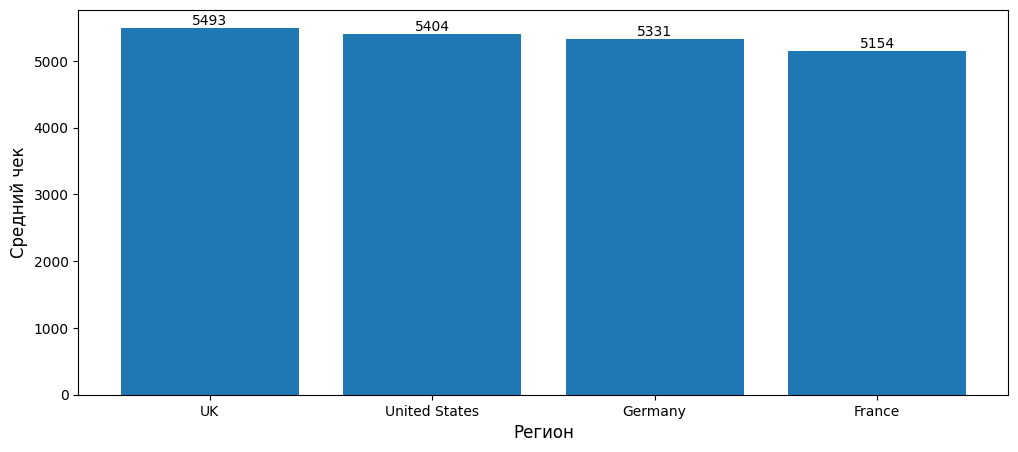


Из диаграммы видно, что средний чек различен, поэтому принимаем нулевую гипотезу H0
ВЫВОД: Средний чек ОТЛИЧАЕТСЯ в зависимости от региона


In [49]:
#Гипотеза о том, что средний чек отличается в зависимости от региона

print('Обозначим нулевую и альтернативную гипотезы:')
print('H0: Средний чек ОТЛИЧАЕТСЯ в зависимости от региона')
print('H1: Средний чек НЕ ОТЛИЧАЕТСЯ в зависимости от региона\n')

#Построим столбчатую диаграмму и рассмотрим ее

top_channel_check = df.groupby(['region'])['revenue_with_promo_code'].apply(lambda x: round(x.mean())).sort_values(ascending=False)
top_channel_check = pd.DataFrame({'region':top_channel_check.index, 'средний чек':top_channel_check.values})
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
axs.bar(top_channel_check['region'], top_channel_check['средний чек'])
axs.set_xlabel("Регион", fontsize=12)
axs.set_ylabel("Средний чек", fontsize=12)
axs.bar_label (axs.containers[0])
plt.show()

print('\nИз диаграммы видно, что средний чек различен, поэтому принимаем нулевую гипотезу H0')
print('ВЫВОД: Средний чек ОТЛИЧАЕТСЯ в зависимости от региона')

Обозначим нулевую и альтернативную гипотезы:
H0: Средний чек ОТЛИЧАЕТСЯ в зависимости от рекламного канала
H1: Средний чек НЕ ОТЛИЧАЕТСЯ в зависимости от рекламного канала



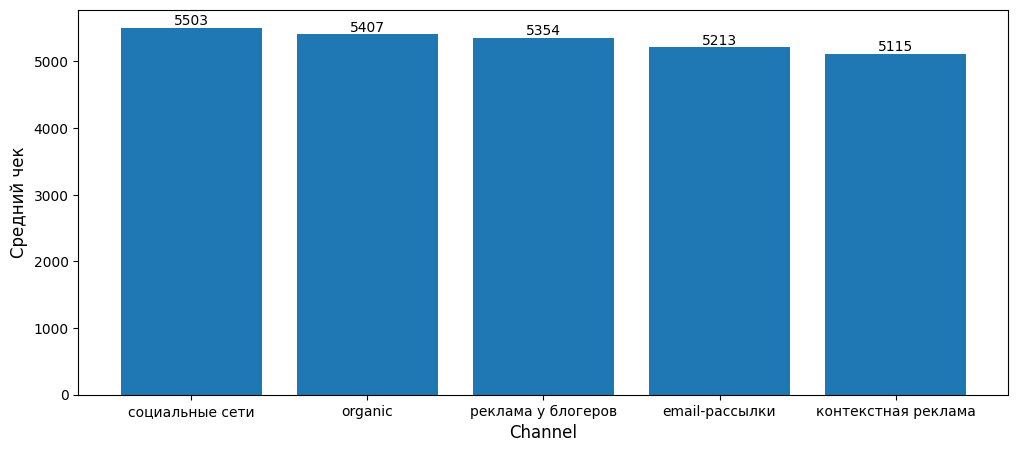


Из диаграммы видно, что средний чек различен, поэтому принимаем нулевую гипотезу H0
ВЫВОД: Средний чек ОТЛИЧАЕТСЯ в зависимости от рекламного канала


In [50]:
#Гипотеза о том, что средний чек отличается в зависимости от рекламного канала

print('Обозначим нулевую и альтернативную гипотезы:')
print('H0: Средний чек ОТЛИЧАЕТСЯ в зависимости от рекламного канала')
print('H1: Средний чек НЕ ОТЛИЧАЕТСЯ в зависимости от рекламного канала\n')

#Построим столбчатую диаграмму и рассмотрим ее

top_channel_check = df.groupby(['channel'])['revenue_with_promo_code'].apply(lambda x: round(x.mean())).sort_values(ascending=False)
top_channel_check = pd.DataFrame({'channel':top_channel_check.index, 'средний чек':top_channel_check.values})
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
axs.bar(top_channel_check['channel'], top_channel_check['средний чек'])
axs.set_xlabel("Channel", fontsize=12)
axs.set_ylabel("Средний чек", fontsize=12)
axs.bar_label (axs.containers[0])
plt.show()

print('\nИз диаграммы видно, что средний чек различен, поэтому принимаем нулевую гипотезу H0')
print('ВЫВОД: Средний чек ОТЛИЧАЕТСЯ в зависимости от рекламного канала')

Обозначим нулевую и альтернативную гипотезы:
H0: Средний чек ОТЛИЧАЕТСЯ в зависимости от времени суток
H1: Средний чек НЕ ОТЛИЧАЕТСЯ в зависимости от времени суток



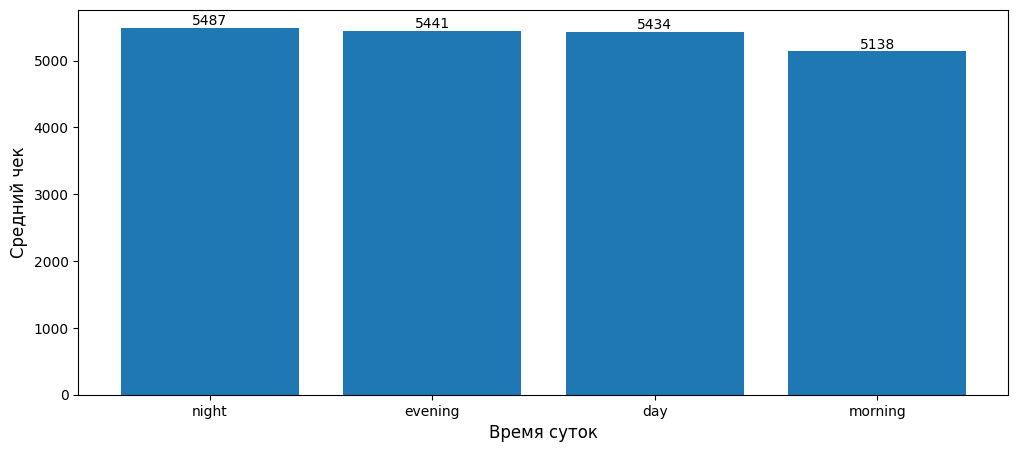


Из диаграммы видно, что средний чек различен, поэтому принимаем нулевую гипотезу H0
ВЫВОД: Средний чек ОТЛИЧАЕТСЯ в зависимости от времени суток


In [51]:
#Гипотеза о том, что средний чек отличается в зависимости от времени суток

print('Обозначим нулевую и альтернативную гипотезы:')
print('H0: Средний чек ОТЛИЧАЕТСЯ в зависимости от времени суток')
print('H1: Средний чек НЕ ОТЛИЧАЕТСЯ в зависимости от времени суток\n')

#Построим столбчатую диаграмму и рассмотрим ее

top_channel_check = df.groupby(['time_of_day'])['revenue_with_promo_code'].apply(lambda x: round(x.mean())).sort_values(ascending=False)
top_channel_check = pd.DataFrame({'time_of_day':top_channel_check.index, 'средний чек':top_channel_check.values})
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
axs.bar(top_channel_check['time_of_day'], top_channel_check['средний чек'])
axs.set_xlabel("Время суток", fontsize=12)
axs.set_ylabel("Средний чек", fontsize=12)
axs.bar_label (axs.containers[0])
plt.show()

print('\nИз диаграммы видно, что средний чек различен, поэтому принимаем нулевую гипотезу H0')
print('ВЫВОД: Средний чек ОТЛИЧАЕТСЯ в зависимости от времени суток')

In [52]:
#Гипотеза о взаимосвязи между продолжительностью сессии и суммой покупок по ВСЕМ пользователям

print('Обозначим нулевую и альтернативную гипотезы:')
print('H0: Взаимосвязь между продолжительностью сессии и суммой покупок НЕТ')
print('H1: Взаимосвязи между продолжительностью сессии и суммой покупок ЕСТЬ')
print('Примим допустимую вероятность ошибки = 0.01\n')

#Рассчитаем p-value

session_duration = df['sessiondurationsec']
revenue = df['revenue_with_promo_code'].fillna(0)
if ((shapiro(session_duration)[1] >= 0.05) and (shapiro(revenue)[1] >= 0.05)):
    p_value = round(pearsonr(session_duration, revenue, alternative='two-sided').pvalue, 4)
else:
    p_value = round(spearmanr(session_duration, revenue, alternative='two-sided').pvalue, 4)
print('p_value = {}\n'.format(p_value))

print('p_value превышает 0.01, поэтому мы принимаем нулевую гипотезу H0')
print('ВЫВОД: Взаимосвязи между продолжительностью сессии и суммой покупок по ВСЕМ пользователям НЕТ')

Обозначим нулевую и альтернативную гипотезы:
H0: Взаимосвязь между продолжительностью сессии и суммой покупок НЕТ
H1: Взаимосвязи между продолжительностью сессии и суммой покупок ЕСТЬ
Примим допустимую вероятность ошибки = 0.01

p_value = 0.6069

p_value превышает 0.01, поэтому мы принимаем нулевую гипотезу H0
ВЫВОД: Взаимосвязи между продолжительностью сессии и суммой покупок по ВСЕМ пользователям НЕТ


In [53]:
#Гипотеза о взаимосвязи между продолжительностью сессии и суммой покупок по ПЛАТЯЩИМ пользователям

print('Обозначим нулевую и альтернативную гипотезы:')
print('H0: Взаимосвязь между продолжительностью сессии и суммой покупок НЕТ')
print('H1: Взаимосвязи между продолжительностью сессии и суммой покупок ЕСТЬ')
print('Примим допустимую вероятность ошибки = 0.01\n')

#Рассчитаем p-value

session_duration = df[['revenue_with_promo_code', 'sessiondurationsec']].dropna()['sessiondurationsec']
revenue = df['revenue_with_promo_code'].dropna()
if ((shapiro(session_duration)[1] >= 0.05) and (shapiro(revenue)[1] >= 0.05)):
    p_value = round(pearsonr(session_duration, revenue, alternative='two-sided').pvalue, 4)
else:
    p_value = round(spearmanr(session_duration, revenue, alternative='two-sided').pvalue, 4)
print('p_value = {}\n'.format(p_value))

print('p_value превышает 0.01, поэтому мы принимаем нулевую гипотезу H0')
print('ВЫВОД: Взаимосвязи между продолжительностью сессии и суммой покупок по ПЛАТЯЩИМ пользователям НЕТ')

Обозначим нулевую и альтернативную гипотезы:
H0: Взаимосвязь между продолжительностью сессии и суммой покупок НЕТ
H1: Взаимосвязи между продолжительностью сессии и суммой покупок ЕСТЬ
Примим допустимую вероятность ошибки = 0.01

p_value = 0.6183

p_value превышает 0.01, поэтому мы принимаем нулевую гипотезу H0
ВЫВОД: Взаимосвязи между продолжительностью сессии и суммой покупок по ПЛАТЯЩИМ пользователям НЕТ


In [54]:
#Гипотеза о взаимосвязи между продолжительностью сессии и типом устройства

print('Обозначим нулевую и альтернативную гипотезы:')
print('H0: Взаимосвязь между продолжительностью сессии и типом устройства НЕТ')
print('H1: Взаимосвязи между продолжительностью сессии и типом устройства ЕСТЬ')
print('Примим допустимую вероятность ошибки = 0.01\n')

#Рассчитаем p-value

session_duration = df['sessiondurationsec']
device = df.groupby(['device'])['sessiondurationsec'].mean()
if ((shapiro(session_duration)[1] >= 0.05) and (shapiro(device)[1] >= 0.05)):
    p_value = round(f_oneway(session_duration, device).pvalue, 4)
else:
    p_value = round(kruskal(session_duration, device).pvalue, 4)
print('p_value = {}\n'.format(p_value))

print('p_value превышает 0.01, поэтому мы принимаем нулевую гипотезу H0')
print('ВЫВОД: Взаимосвязи между продолжительностью сессии и типом устройства НЕТ')

Обозначим нулевую и альтернативную гипотезы:
H0: Взаимосвязь между продолжительностью сессии и типом устройства НЕТ
H1: Взаимосвязи между продолжительностью сессии и типом устройства ЕСТЬ
Примим допустимую вероятность ошибки = 0.01

p_value = 0.3382

p_value превышает 0.01, поэтому мы принимаем нулевую гипотезу H0
ВЫВОД: Взаимосвязи между продолжительностью сессии и типом устройства НЕТ


Обозначим нулевую и альтернативную гипотезы:
H0: Количество пользователей с промокодами ОТЛИЧАЕТСЯ в зависимости от рекламного канала
H1: Количество пользователей с промокодами НЕ ОТЛИЧАЕТСЯ в зависимости от рекламного канала



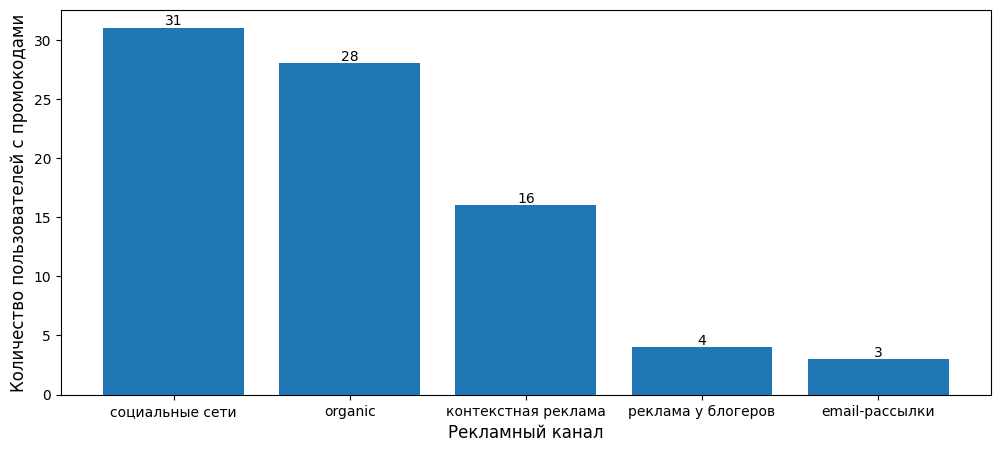


Из диаграммы видно, что средний чек различен, поэтому принимаем нулевую гипотезу H0
ВЫВОД: Количество пользователей с промокодами ОТЛИЧАЕТСЯ в зависимости от рекламного канала


In [55]:
#Гипотеза о том, что количество пользователей с промокодами отличается по рекламным каналам

print('Обозначим нулевую и альтернативную гипотезы:')
print('H0: Количество пользователей с промокодами ОТЛИЧАЕТСЯ в зависимости от рекламного канала')
print('H1: Количество пользователей с промокодами НЕ ОТЛИЧАЕТСЯ в зависимости от рекламного канала\n')

#Построим столбчатую диаграмму и рассмотрим ее

top_channel_check = df.groupby(['channel'])['promo_code'].apply(lambda x: round(x.sum())).sort_values(ascending=False)
top_channel_check = pd.DataFrame({'channel':top_channel_check.index, 'количество пользователей с промокодами':top_channel_check.values})
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
axs.bar(top_channel_check['channel'], top_channel_check['количество пользователей с промокодами'])
axs.set_xlabel("Рекламный канал", fontsize=12)
axs.set_ylabel("Количество пользователей с промокодами", fontsize=12)
axs.bar_label (axs.containers[0])
plt.show()

print('\nИз диаграммы видно, что средний чек различен, поэтому принимаем нулевую гипотезу H0')
print('ВЫВОД: Количество пользователей с промокодами ОТЛИЧАЕТСЯ в зависимости от рекламного канала')

Обозначим нулевую и альтернативную гипотезы:
H0: Количество пользователей с промокодами ОТЛИЧАЕТСЯ в зависимости от рекламного канала
H1: Количество пользователей с промокодами НЕ ОТЛИЧАЕТСЯ в зависимости от рекламного канала



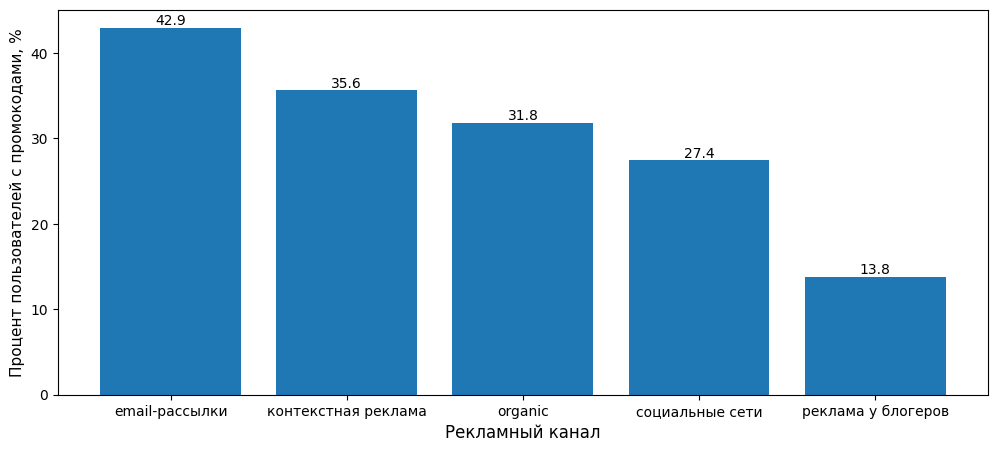


Из диаграммы видно, что средний чек различен, поэтому принимаем нулевую гипотезу H0
ВЫВОД: Процент пользователей с промокодами ОТЛИЧАЕТСЯ в зависимости от рекламного канала


In [56]:
#Гипотеза о том, что ПРОЦЕНТ пользователей с промокодами отличается по рекламным каналам

print('Обозначим нулевую и альтернативную гипотезы:')
print('H0: Количество пользователей с промокодами ОТЛИЧАЕТСЯ в зависимости от рекламного канала')
print('H1: Количество пользователей с промокодами НЕ ОТЛИЧАЕТСЯ в зависимости от рекламного канала\n')

#Построим столбчатую диаграмму и рассмотрим ее

top_channel_check = df.groupby(['channel'])['promo_code'].apply(lambda x: round(x.sum() / x.count() * 100, 1)).sort_values(ascending=False)
top_channel_check = pd.DataFrame({'channel':top_channel_check.index, 'процент пользователей с промокодами':top_channel_check.values})
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
axs.bar(top_channel_check['channel'], top_channel_check['процент пользователей с промокодами'])
axs.set_xlabel("Рекламный канал", fontsize=12)
axs.set_ylabel("Процент пользователей с промокодами, %", fontsize=11)
axs.bar_label (axs.containers[0])
plt.show()

print('\nИз диаграммы видно, что средний чек различен, поэтому принимаем нулевую гипотезу H0')
print('ВЫВОД: Процент пользователей с промокодами ОТЛИЧАЕТСЯ в зависимости от рекламного канала')